We start by Installing all the required dependencies

In [144]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

In [145]:
import numpy as np
from qiskit import* 

We create the QuanticCircuit with 8 qubits

In [146]:
circ = QuantumCircuit(8)


We create the differents possibilities

In [147]:
circ.h(0) #Bob
circ.h(1) #Alice
circ.h(2) #Damien
circ.h(3) #Yohen


In [148]:
# Generate the answer from Bob
circ.cx(1,4)
circ.cx(2,4)
circ.cx(3,4)

In [149]:
# We Broadcast the answer from Bob to the others
circ.cx(4,5)
circ.cx(4,6)
circ.cx(4,7)

In [150]:
# Generate the answer from Alice
circ.cx(2,5)
circ.cx(3,5)

In [151]:
# We Broadcast the answer from Alice to the others
circ.cx(5,6)
circ.cx(5,7)

In [152]:
# Generate the answer from Damien
circ.cx(3,6)

In [153]:
# We Broadcast the answer from Damien to the Yohen
circ.cx(6,7)

/opt/conda/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


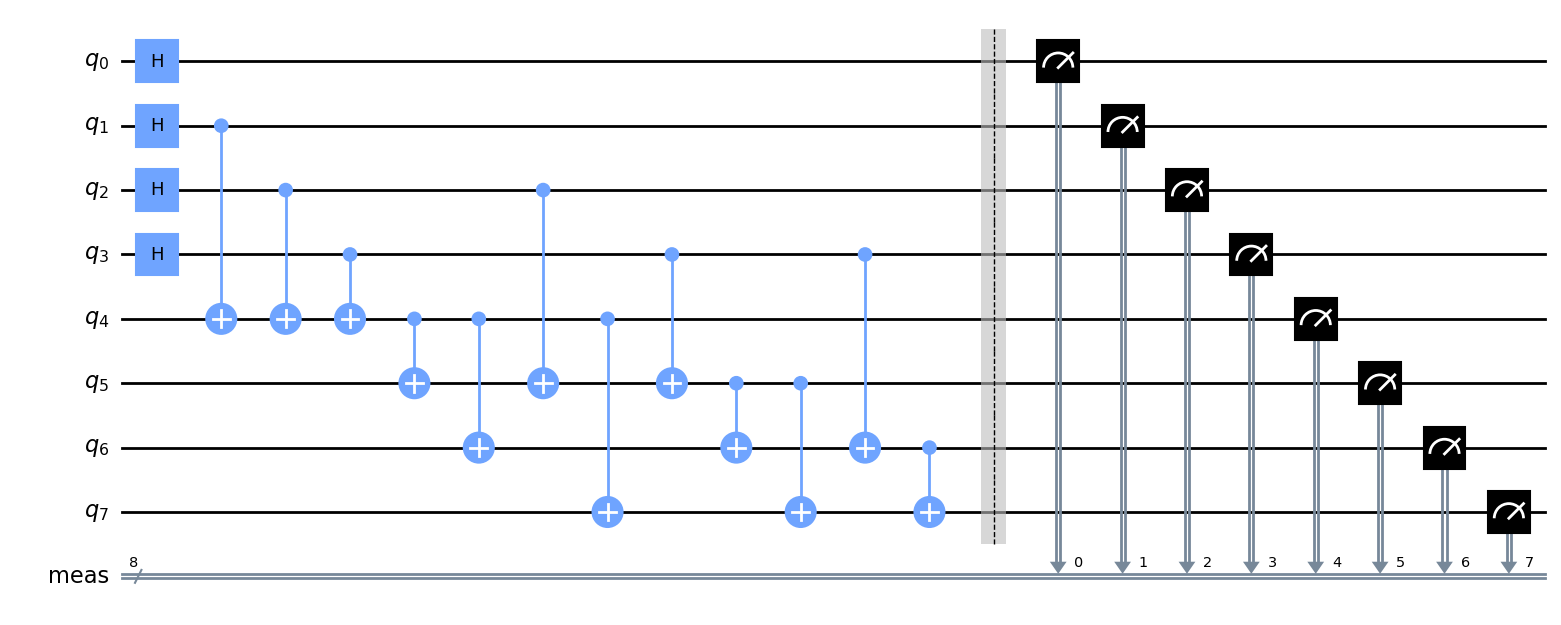

In [154]:
# Mesure and Show the circuit
circ.measure_all()
circ.draw("mpl")

In [155]:
# USE OF QUANTIC SIMULATOR 
from qiskit import Aer

# We do the calculation
simulation = Aer.get_backend('qasm_simulator')
data = execute(circ, backend=simulation, shots=10000).result()

In [156]:
# Filter the results
results = data.get_counts()

filteredData = {}

for key, value in results.items():
    row = key[7]+key[6]+key[5]+key[4]+key[0]
    filteredData[row] = value


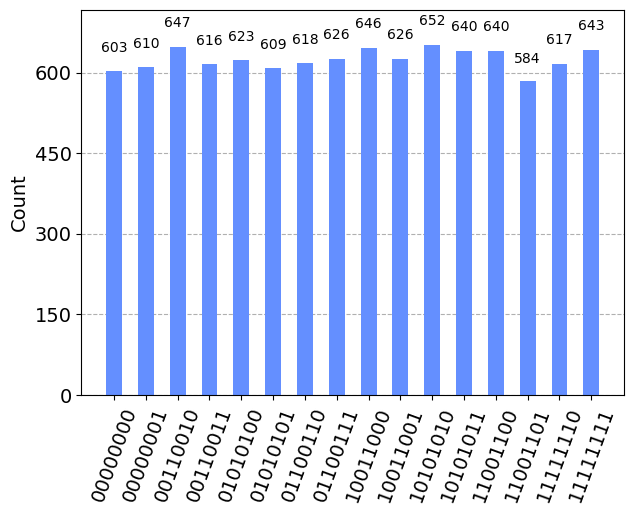

In [157]:
# Display the results
from qiskit.visualization import plot_histogram

plot_histogram(filteredData)
plot_histogram(data.get_counts())